# **Análisis exploratorio de datos (EDA) Propensión Compra de un Seguro**

**Tabla de Contenido**

1) Descripción del Problema
2) Descripción de los datos
3) Depuración Datos: Mapeo Variables, Datos Nulos, Recodificación Variables, Creación de Nuevas Variables, Imputación Variables

4) Análisis Exploratorio y Descriptivo: Análisis Univariado, Análisis Multivariado, Selección Features



## **1) Descripción del Problema**

Los correos a todos los potenciales clientes de un producto no son una estrategia de marketing efectiva, ya que muchos de ellos no están interesados. Identificando a los más propensos a contratar el producto se podría dirigir la campaña de marketing con mayor precisión y reducir su coste.

La compañía financiera ofrece seguros, créditos, etc. y nos proporciona un listado de clientes a los que ha dirigido una campaña de marketing ofreciendo el nuevo producto “Seguro Vivienda”. En el fichero se encuentran los datos de dichos clientes, así como información de otros productos ya contratados y si contrataron el nuevo producto o no. También se dispone de un fichero con información sociodemográfica asociada a diferentes zonas de residencia.


## **2) Descripción de los datos**

**Clientes**

* ID_Cliente: identificador único del cliente
* Fecha_Nacimiento: fecha de nacimiento del cliente
* Fecha_Alta: fecha de alta del cliente
* Sexo: sexo del cliente
* ID_Zona: identificador único de zona de residencia
* Productos_X: número de productos contratados por tipo
* Gasto_X: gasto anual en los distintos productos
* Seguro_Vivienda: el cliente contrató el producto ofrecido o no

**Zonas**

* ID_Zona: identificador único de zona
* Tipo_X: porcentaje de población por tipología familiar
* Educacion_X: porcentaje de población por nivel de estudios
* Poblacion_X: porcentaje de población por tipo de población
* Vivienda_X: porcentaje de población por tipo de vivienda
* Medico_X: porcentaje de población por tipo de seguro médico
* Ingresos_X: porcentaje de población por nivel de ingresos


**Librerias**

In [115]:
import pandas as pd # Esta libreria es para depurar datos, "Excel de python"
import numpy as np ## Realizar operaciones matematicas
import seaborn as sns # Gráficas estadisticas
import matplotlib.pyplot as plt # Gráficas
import os ## Sistema
from scipy import stats # Test estadisticos
import statsmodels.api as sms
from statsmodels.stats.weightstats import DescrStatsW

from datetime import datetime
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
#!pip install sta    

**Importar Datos**

In [3]:
datos_train=pd.read_csv("Insumos/Clientes_train.csv",sep="\t")

In [4]:
datos_train

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Seguro_Vivienda
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,0.00,False
1,C2975,08/12/1978,26/12/1998,Mujer,Z1201,2,0,1,973.61,0.00,386.87,False
2,C0840,31/07/1950,19/04/1972,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,False
3,C0461,29/07/1945,21/07/1967,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,False
4,C2777,17/10/1955,22/02/1976,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2994,C1524,02/11/1961,30/08/1982,Hombre,Z1593,0,1,2,0.00,6712.11,82.93,True
2995,C3670,18/09/1953,15/03/1975,Hombre,Z1023,0,1,1,0.00,1653.89,36.73,False
2996,C0919,15/11/1950,27/12/1971,Hombre,Z0421,0,3,1,0.00,3704.71,89.90,False
2997,C0235,12/08/1970,23/01/1991,Hombre,Z1070,0,0,2,0.00,0.00,242.76,False


In [5]:
datos_test=pd.read_csv("Insumos/Clientes_test.csv",sep="\t")

In [6]:
datos_test

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros
0,C2172,05/10/1981,04/02/2005,Hombre,Z0403,1,2,2,735.14,2535.49,337.77
1,C1627,21/09/1983,27/12/2004,Mujer,Z0700,0,1,1,0.00,3195.94,87.96
2,C0649,24/01/1945,02/12/1967,Hombre,Z1023,0,0,0,0.00,0.00,0.00
3,C0712,11/07/1945,15/10/1966,Hombre,Z0648,0,1,0,0.00,3183.59,0.00
4,C0648,09/02/1964,11/09/1988,Hombre,Z0955,0,1,2,0.00,3613.07,238.26
...,...,...,...,...,...,...,...,...,...,...,...
888,C2417,20/08/1952,01/02/1974,Hombre,Z0815,0,1,0,0.00,4264.50,0.00
889,C2279,21/11/1983,10/03/2008,Hombre,Z1506,0,0,2,0.00,0.00,559.94
890,C3365,23/06/1981,31/03/2002,Hombre,Z0860,0,0,0,0.00,0.00,0.00
891,C0237,26/11/1958,25/01/1981,Hombre,Z0318,0,1,0,0.00,2036.26,0.00


**Dimensión Base de Datos**

In [7]:
print(f'La Base de Datos Train tiene {datos_train.shape[0]} filas y tiene {datos_train.shape[1]} columnas')
print(f'La Base de Datos Test tiene {datos_test.shape[0]} filas y tiene {datos_test.shape[1]} columnas')

La Base de Datos Train tiene 2999 filas y tiene 12 columnas
La Base de Datos Test tiene 893 filas y tiene 11 columnas


In [8]:
print(f'Las Variables de la base de train son: {datos_train.columns.tolist()}')

Las Variables de la base de train son: ['ID_Cliente', 'Fecha_Nacimiento', 'Fecha_Alta', 'Sexo', 'ID_Zona', 'Productos_Vida', 'Productos_Vehiculos', 'Productos_Otros', 'Gasto_Vida', 'Gasto_Vehiculos', 'Gasto_Otros', 'Seguro_Vivienda']


In [9]:
print(f'Las Variables de la base de test son: {datos_test.columns.tolist()}')

Las Variables de la base de test son: ['ID_Cliente', 'Fecha_Nacimiento', 'Fecha_Alta', 'Sexo', 'ID_Zona', 'Productos_Vida', 'Productos_Vehiculos', 'Productos_Otros', 'Gasto_Vida', 'Gasto_Vehiculos', 'Gasto_Otros']


**Unir las Base de Datos**

In [10]:
## Creamos una variable llamada tipodatos en cada base de datos
datos_train["Tipo Archivo"]="Entrenamiento"
datos_test["Tipo Archivo"]="Prueba"

In [11]:
df=pd.concat([datos_train,datos_test],axis=0) # Union de dos tablas con axis=0, por filas

In [12]:
df.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Seguro_Vivienda,Tipo Archivo
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,0.00,False,Entrenamiento
1,C2975,08/12/1978,26/12/1998,Mujer,Z1201,2,0,1,973.61,0.00,386.87,False,Entrenamiento
2,C0840,31/07/1950,19/04/1972,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,False,Entrenamiento
3,C0461,29/07/1945,21/07/1967,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,False,Entrenamiento
4,C2777,17/10/1955,22/02/1976,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,False,Entrenamiento


In [13]:
df.shape

(3892, 13)

In [14]:
df.tail()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Seguro_Vivienda,Tipo Archivo
888,C2417,20/08/1952,01/02/1974,Hombre,Z0815,0,1,0,0.0,4264.50,0.00,NaN,Prueba
889,C2279,21/11/1983,10/03/2008,Hombre,Z1506,0,0,2,0.0,0.00,559.94,NaN,Prueba
890,C3365,23/06/1981,31/03/2002,Hombre,Z0860,0,0,0,0.0,0.00,0.00,NaN,Prueba
891,C0237,26/11/1958,25/01/1981,Hombre,Z0318,0,1,0,0.0,2036.26,0.00,NaN,Prueba
892,C3112,22/06/1946,12/06/1967,Hombre,Z0865,0,0,2,0.0,0.00,293.19,NaN,Prueba


**Unir los datos de Zona**

In [15]:
datos_zona=pd.read_csv("Insumos/Zonas.csv",sep="\t")

In [16]:
datos_zona

,ID_Zona,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,Z0000,16.66,25.17,58.17,0.00,80.08,19.92,0.00,0.00,0.00,100.00,0.00,100.00,16.96,83.04,0.00,0.00,100.00
1,Z0002,54.13,45.87,0.00,40.72,43.42,15.86,70.45,29.55,0.00,0.00,83.52,16.48,78.07,21.93,0.00,55.10,44.90
2,Z0006,57.29,42.71,0.00,31.15,68.85,0.00,31.51,68.49,0.00,0.00,100.00,0.00,31.89,68.11,0.00,0.00,100.00
3,Z0007,56.37,14.73,28.91,20.01,40.77,39.21,25.79,22.76,33.59,17.86,0.00,100.00,0.00,100.00,0.00,0.00,100.00
4,Z0009,100.00,0.00,0.00,100.00,0.00,0.00,100.00,0.00,0.00,0.00,100.00,0.00,100.00,0.00,33.01,33.30,33.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Z1833,29.80,40.49,29.71,37.11,22.43,40.46,40.19,45.32,14.48,0.00,79.21,20.79,31.49,68.51,7.78,6.40,85.83
1200,Z1836,18.03,51.77,30.21,25.37,41.11,33.52,14.73,19.65,0.00,65.62,79.06,20.94,12.54,87.46,17.82,2.27,79.92
1201,Z1838,45.38,54.62,0.00,0.00,47.89,52.11,19.37,18.51,31.21,30.91,95.92,4.08,22.55,77.45,0.00,7.95,92.05
1202,Z1841,100.00,0.00,0.00,46.14,53.86,0.00,100.00,0.00,0.00,0.00,100.00,0.00,72.90,27.10,0.00,100.00,0.00


In [17]:
df_completa=pd.merge(df,datos_zona,on="ID_Zona",how="left")

# pd.merge(df1, df2, left_on='clave1', right_on='clave2', how='left')

In [18]:
df_completa.shape

(3892, 30)

In [19]:
df_completa.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Seguro_Vivienda,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,0.00,False,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
1,C2975,08/12/1978,26/12/1998,Mujer,Z1201,2,0,1,973.61,0.00,386.87,False,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62
2,C0840,31/07/1950,19/04/1972,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,False,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28
3,C0461,29/07/1945,21/07/1967,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,False,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84
4,C2777,17/10/1955,22/02/1976,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,False,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66


## **2) Depuración Datos**

**Renombrar Variables**

In [20]:
# cambiar el nombre de la variable Seguro_Vivienda por CompraSeguro

In [21]:
df_completa.rename(columns={"Seguro_Vivienda":"CompraSeguro"},inplace=True)

In [22]:
df_completa.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,CompraSeguro,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,0.00,False,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
1,C2975,08/12/1978,26/12/1998,Mujer,Z1201,2,0,1,973.61,0.00,386.87,False,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62
2,C0840,31/07/1950,19/04/1972,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,False,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28
3,C0461,29/07/1945,21/07/1967,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,False,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84
4,C2777,17/10/1955,22/02/1976,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,False,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66


In [23]:
## Vamos a Homologar la varible, seria False por 0 y True por 1

In [24]:
## Propias funciones

In [25]:
## sumar dos numeros

In [26]:
def SumarDosNumeros(x,y):
    resultado=x+y
    return resultado

In [27]:
SumarDosNumeros(x=1,y=4)

5

In [28]:
SumarDosNumeros(1,5)

6

In [29]:
# condicionales

In [30]:
Compra=False

In [31]:
def HomologarCompra(Compra):
    if (Compra==False):
        Homologacion=0
    elif(Compra==True):
        Homologacion=1
    else:
        Homologacion=np.nan
    return Homologacion

In [32]:
df_completa["CompraSeguro"][0] # Primer cliente

False

In [33]:
HomologarCompra(df_completa["CompraSeguro"][0]) # Usando la función

0

In [34]:
## Realizar el calculo para todos los clintes de la base de datos

En Python, los bucles for se utilizan para iterar sobre una secuencia (como una lista, una tupla, un diccionario, un conjunto o una cadena). Este es el formato más básico de un bucle for:



In [35]:
## No es recomendado, para Big data, se recomienda usar funciones vectoriales, como las apply
ListaResultado=[]
for i in range(0,len(df_completa)):
    Resultado=HomologarCompra(df_completa["CompraSeguro"][i])
    ListaResultado.append(Resultado)

In [36]:
ListaResultado[0]

0

In [37]:
## Vamos agregar la Variable Homologación a la Base de datos

In [38]:
df_completa["CompraSeguro"]=ListaResultado

In [39]:
df_completa

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,CompraSeguro,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,0.00,0.0,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
1,C2975,08/12/1978,26/12/1998,Mujer,Z1201,2,0,1,973.61,0.00,386.87,0.0,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62
2,C0840,31/07/1950,19/04/1972,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,0.0,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28
3,C0461,29/07/1945,21/07/1967,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,0.0,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84
4,C2777,17/10/1955,22/02/1976,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,0.0,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,C2417,20/08/1952,01/02/1974,Hombre,Z0815,0,1,0,0.00,4264.50,0.00,NaN,Prueba,58.31,41.69,0.00,0.00,41.69,58.31,38.26,21.88,22.70,17.17,68.87,31.13,46.58,53.42,0.00,12.40,87.60
3888,C2279,21/11/1983,10/03/2008,Hombre,Z1506,0,0,2,0.00,0.00,559.94,NaN,Prueba,53.03,41.30,5.68,20.28,57.92,21.79,31.80,30.61,8.50,29.09,35.65,64.35,30.33,69.67,0.00,0.00,100.00
3889,C3365,23/06/1981,31/03/2002,Hombre,Z0860,0,0,0,0.00,0.00,0.00,NaN,Prueba,40.59,59.41,0.00,0.00,43.06,56.94,0.00,16.88,61.46,21.67,52.24,47.76,0.00,100.00,0.00,8.05,91.96
3890,C0237,26/11/1958,25/01/1981,Hombre,Z0318,0,1,0,0.00,2036.26,0.00,NaN,Prueba,29.25,12.18,58.57,13.95,53.90,32.14,15.70,51.54,0.00,32.76,41.38,58.62,46.61,53.39,0.00,55.48,44.52


In [40]:
df_completa["Sexo"].unique() ## Valores Unicos

array(['Mujer', 'Hombre'], dtype=object)

In [41]:
df_completa["Productos_Vida"].unique()

array([0, 2, 1, 4, 3, 8])

In [42]:
df_completa["Productos_Vida"].nunique()

6

In [43]:
df_completa["Productos_Vida"].isnull().sum()

0

### **Mapeo Variables**

In [44]:
df_completa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3892 entries, 0 to 3891
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_Cliente                           3892 non-null   object 
 1   Fecha_Nacimiento                     3892 non-null   object 
 2   Fecha_Alta                           3892 non-null   object 
 3   Sexo                                 3892 non-null   object 
 4   ID_Zona                              3892 non-null   object 
 5   Productos_Vida                       3892 non-null   int64  
 6   Productos_Vehiculos                  3892 non-null   int64  
 7   Productos_Otros                      3892 non-null   int64  
 8   Gasto_Vida                           3892 non-null   float64
 9   Gasto_Vehiculos                      3892 non-null   float64
 10  Gasto_Otros                          3892 non-null   float64
 11  CompraSeguro                  

In [45]:
def Mapeo(df_completa):
    Variables=df_completa.columns.tolist()
    CantidadValoresUnicos=[]
    VectorValoresUnicos=[]
    Tipo_Variable=[]
    nulos=[]
    for i in range(0,len(Variables)):
        CantidadValoresUnicos.append(df_completa[Variables[i]].nunique())
        VectorValoresUnicos.append(df_completa[Variables[i]].unique())
        Tipo_Variable.append(df_completa[Variables[i]].dtype)
        nulos.append(df_completa[Variables[i]].isnull().sum())
    Tabla=pd.DataFrame({"Variable":Variables,"Cant_ValoresUni":CantidadValoresUnicos,
                        "VectorValoresUni":VectorValoresUnicos,
                        "TipoVariable":Tipo_Variable,"nulos":nulos})
    Tabla["PorcentajeNulos"]=(Tabla["nulos"]/len(df_completa))*100
    return Tabla

In [46]:
Diagnostico1=Mapeo(df_completa)

In [47]:
Diagnostico1

,Variable,Cant_ValoresUni,VectorValoresUni,TipoVariable,nulos,PorcentajeNulos
0,ID_Cliente,3892,"[C3088, C2975, C0840, C0461, C2777, C1869, C03...",object,0,0.000000
1,Fecha_Nacimiento,3478,"[29/03/1968, 08/12/1978, 31/07/1950, 29/07/194...",object,0,0.000000
2,Fecha_Alta,3259,"[27/03/1989, 26/12/1998, 19/04/1972, 21/07/196...",object,0,0.000000
3,Sexo,2,"[Mujer, Hombre]",object,0,0.000000
4,ID_Zona,1222,"[Z1143, Z1201, Z1122, Z1190, Z1344, Z1082, Z11...",object,0,0.000000
5,Productos_Vida,6,"[0, 2, 1, 4, 3, 8]",int64,0,0.000000
6,Productos_Vehiculos,10,"[1, 0, 2, 3, 4, 5, 6, 8, 7, 10]",int64,0,0.000000
7,Productos_Otros,9,"[0, 1, 2, 3, 6, 7, 4, 5, 8]",int64,0,0.000000
8,Gasto_Vida,215,"[0.0, 973.61, 87.91, 103.63, 167.85, 396.99, 3...",float64,0,0.000000
9,Gasto_Vehiculos,2332,"[617.55, 0.0, 3572.01, 4558.71, 4289.61, 1007....",float64,0,0.000000


## **Recodificación Variables**

In [48]:
# Fecha_Nacimiento y Fecha_Alta deben ser de tipo datetime

In [49]:
df_completa.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,CompraSeguro,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,0.00,0.0,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
1,C2975,08/12/1978,26/12/1998,Mujer,Z1201,2,0,1,973.61,0.00,386.87,0.0,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62
2,C0840,31/07/1950,19/04/1972,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,0.0,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28
3,C0461,29/07/1945,21/07/1967,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,0.0,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84
4,C2777,17/10/1955,22/02/1976,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,0.0,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66


In [50]:
df_completa["Fecha_Nacimiento"]=pd.to_datetime(df_completa["Fecha_Nacimiento"], format="%d/%m/%Y")
df_completa["Fecha_Alta"]=pd.to_datetime(df_completa["Fecha_Alta"], format="%d/%m/%Y")

In [51]:
Diagnostico2=Mapeo(df_completa)
Diagnostico2

,Variable,Cant_ValoresUni,VectorValoresUni,TipoVariable,nulos,PorcentajeNulos
0,ID_Cliente,3892,"[C3088, C2975, C0840, C0461, C2777, C1869, C03...",object,0,0.000000
1,Fecha_Nacimiento,3478,"[1968-03-29T00:00:00.000000000, 1978-12-08T00:...",datetime64[ns],0,0.000000
2,Fecha_Alta,3259,"[1989-03-27T00:00:00.000000000, 1998-12-26T00:...",datetime64[ns],0,0.000000
3,Sexo,2,"[Mujer, Hombre]",object,0,0.000000
4,ID_Zona,1222,"[Z1143, Z1201, Z1122, Z1190, Z1344, Z1082, Z11...",object,0,0.000000
5,Productos_Vida,6,"[0, 2, 1, 4, 3, 8]",int64,0,0.000000
6,Productos_Vehiculos,10,"[1, 0, 2, 3, 4, 5, 6, 8, 7, 10]",int64,0,0.000000
7,Productos_Otros,9,"[0, 1, 2, 3, 6, 7, 4, 5, 8]",int64,0,0.000000
8,Gasto_Vida,215,"[0.0, 973.61, 87.91, 103.63, 167.85, 396.99, 3...",float64,0,0.000000
9,Gasto_Vehiculos,2332,"[617.55, 0.0, 3572.01, 4558.71, 4289.61, 1007....",float64,0,0.000000


In [52]:
## Que deberian ser categoricas

In [53]:
df_completa[["Sexo","Productos_Vida","Productos_Vehiculos","Productos_Otros","CompraSeguro"]]=df_completa[["Sexo","Productos_Vida","Productos_Vehiculos","Productos_Otros","CompraSeguro"]].astype("category")

In [54]:
Diagnostico3=Mapeo(df_completa)
Diagnostico3

,Variable,Cant_ValoresUni,VectorValoresUni,TipoVariable,nulos,PorcentajeNulos
0,ID_Cliente,3892,"[C3088, C2975, C0840, C0461, C2777, C1869, C03...",object,0,0.000000
1,Fecha_Nacimiento,3478,"[1968-03-29T00:00:00.000000000, 1978-12-08T00:...",datetime64[ns],0,0.000000
2,Fecha_Alta,3259,"[1989-03-27T00:00:00.000000000, 1998-12-26T00:...",datetime64[ns],0,0.000000
3,Sexo,2,"['Mujer', 'Hombre'] Categories (2, object): ['...",category,0,0.000000
4,ID_Zona,1222,"[Z1143, Z1201, Z1122, Z1190, Z1344, Z1082, Z11...",object,0,0.000000
5,Productos_Vida,6,"[0, 2, 1, 4, 3, 8] Categories (6, int64): [0, ...",category,0,0.000000
6,Productos_Vehiculos,10,"[1, 0, 2, 3, 4, 5, 6, 8, 7, 10] Categories (10...",category,0,0.000000
7,Productos_Otros,9,"[0, 1, 2, 3, 6, 7, 4, 5, 8] Categories (9, int...",category,0,0.000000
8,Gasto_Vida,215,"[0.0, 973.61, 87.91, 103.63, 167.85, 396.99, 3...",float64,0,0.000000
9,Gasto_Vehiculos,2332,"[617.55, 0.0, 3572.01, 4558.71, 4289.61, 1007....",float64,0,0.000000


## **Creación de Nuevas Variables**

In [55]:
df_completa.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,CompraSeguro,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,1968-03-29,1989-03-27,Mujer,Z1143,0,1,0,0.00,617.55,0.00,0.0,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
1,C2975,1978-12-08,1998-12-26,Mujer,Z1201,2,0,1,973.61,0.00,386.87,0.0,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62
2,C0840,1950-07-31,1972-04-19,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,0.0,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28
3,C0461,1945-07-29,1967-07-21,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,0.0,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84
4,C2777,1955-10-17,1976-02-22,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,0.0,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66


In [56]:
def CalcularEdad(fecha_nacimiento):
    fecha_actual=datetime.now()
    EdadActual=fecha_actual.year-fecha_nacimiento.year
    return EdadActual

In [57]:
CalcularEdad(df_completa["Fecha_Nacimiento"][25])

62

In [58]:
## aplicando una uncion vectorial
df_completa["Edad"]=df_completa["Fecha_Nacimiento"].apply(CalcularEdad)

In [59]:
df_completa

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,CompraSeguro,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad
0,C3088,1968-03-29,1989-03-27,Mujer,Z1143,0,1,0,0.00,617.55,0.00,0.0,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30,55
1,C2975,1978-12-08,1998-12-26,Mujer,Z1201,2,0,1,973.61,0.00,386.87,0.0,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62,45
2,C0840,1950-07-31,1972-04-19,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,0.0,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28,73
3,C0461,1945-07-29,1967-07-21,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,0.0,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84,78
4,C2777,1955-10-17,1976-02-22,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,0.0,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,C2417,1952-08-20,1974-02-01,Hombre,Z0815,0,1,0,0.00,4264.50,0.00,NaN,Prueba,58.31,41.69,0.00,0.00,41.69,58.31,38.26,21.88,22.70,17.17,68.87,31.13,46.58,53.42,0.00,12.40,87.60,71
3888,C2279,1983-11-21,2008-03-10,Hombre,Z1506,0,0,2,0.00,0.00,559.94,NaN,Prueba,53.03,41.30,5.68,20.28,57.92,21.79,31.80,30.61,8.50,29.09,35.65,64.35,30.33,69.67,0.00,0.00,100.00,40
3889,C3365,1981-06-23,2002-03-31,Hombre,Z0860,0,0,0,0.00,0.00,0.00,NaN,Prueba,40.59,59.41,0.00,0.00,43.06,56.94,0.00,16.88,61.46,21.67,52.24,47.76,0.00,100.00,0.00,8.05,91.96,42
3890,C0237,1958-11-26,1981-01-25,Hombre,Z0318,0,1,0,0.00,2036.26,0.00,NaN,Prueba,29.25,12.18,58.57,13.95,53.90,32.14,15.70,51.54,0.00,32.76,41.38,58.62,46.61,53.39,0.00,55.48,44.52,65


## **Variables Temporales**

In [60]:
df_completa["Anio Alta"]=df_completa["Fecha_Alta"].dt.year

In [61]:
df_completa["Mes Alta"]=df_completa["Fecha_Alta"].dt.month # mes en numero

In [62]:
## Mes texto
df_completa["Mes Alta"]=df_completa["Fecha_Alta"].dt.strftime("%B") # En ingles el nombre el mes

In [63]:
df_completa

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,CompraSeguro,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad,Anio Alta,Mes Alta
0,C3088,1968-03-29,1989-03-27,Mujer,Z1143,0,1,0,0.00,617.55,0.00,0.0,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30,55,1989,March
1,C2975,1978-12-08,1998-12-26,Mujer,Z1201,2,0,1,973.61,0.00,386.87,0.0,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62,45,1998,December
2,C0840,1950-07-31,1972-04-19,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,0.0,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28,73,1972,April
3,C0461,1945-07-29,1967-07-21,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,0.0,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84,78,1967,July
4,C2777,1955-10-17,1976-02-22,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,0.0,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66,68,1976,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,C2417,1952-08-20,1974-02-01,Hombre,Z0815,0,1,0,0.00,4264.50,0.00,NaN,Prueba,58.31,41.69,0.00,0.00,41.69,58.31,38.26,21.88,22.70,17.17,68.87,31.13,46.58,53.42,0.00,12.40,87.60,71,1974,February
3888,C2279,1983-11-21,2008-03-10,Hombre,Z1506,0,0,2,0.00,0.00,559.94,NaN,Prueba,53.03,41.30,5.68,20.28,57.92,21.79,31.80,30.61,8.50,29.09,35.65,64.35,30.33,69.67,0.00,0.00,100.00,40,2008,March
3889,C3365,1981-06-23,2002-03-31,Hombre,Z0860,0,0,0,0.00,0.00,0.00,NaN,Prueba,40.59,59.41,0.00,0.00,43.06,56.94,0.00,16.88,61.46,21.67,52.24,47.76,0.00,100.00,0.00,8.05,91.96,42,2002,March
3890,C0237,1958-11-26,1981-01-25,Hombre,Z0318,0,1,0,0.00,2036.26,0.00,NaN,Prueba,29.25,12.18,58.57,13.95,53.90,32.14,15.70,51.54,0.00,32.76,41.38,58.62,46.61,53.39,0.00,55.48,44.52,65,1981,January


In [64]:
## Para Español, Generamos un diccionario
meses_en_español={
1:"Enero",
    2:"Febrero",
    3:"Marzo",
    4:"Abril",
    5:"Mayo",
    6:"Junio",
    7:"Julio",
    8:"Agosto",
    9:"Septiembre",
    10:"Octubre",
    11:"Noviembre",
    12:"Diciembre"

}

In [65]:
df_completa["Mes Alta"]=df_completa["Fecha_Alta"].dt.month.replace(meses_en_español)

In [66]:
df_completa

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,CompraSeguro,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad,Anio Alta,Mes Alta
0,C3088,1968-03-29,1989-03-27,Mujer,Z1143,0,1,0,0.00,617.55,0.00,0.0,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30,55,1989,Marzo
1,C2975,1978-12-08,1998-12-26,Mujer,Z1201,2,0,1,973.61,0.00,386.87,0.0,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62,45,1998,Diciembre
2,C0840,1950-07-31,1972-04-19,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,0.0,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28,73,1972,Abril
3,C0461,1945-07-29,1967-07-21,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,0.0,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84,78,1967,Julio
4,C2777,1955-10-17,1976-02-22,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,0.0,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66,68,1976,Febrero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,C2417,1952-08-20,1974-02-01,Hombre,Z0815,0,1,0,0.00,4264.50,0.00,NaN,Prueba,58.31,41.69,0.00,0.00,41.69,58.31,38.26,21.88,22.70,17.17,68.87,31.13,46.58,53.42,0.00,12.40,87.60,71,1974,Febrero
3888,C2279,1983-11-21,2008-03-10,Hombre,Z1506,0,0,2,0.00,0.00,559.94,NaN,Prueba,53.03,41.30,5.68,20.28,57.92,21.79,31.80,30.61,8.50,29.09,35.65,64.35,30.33,69.67,0.00,0.00,100.00,40,2008,Marzo
3889,C3365,1981-06-23,2002-03-31,Hombre,Z0860,0,0,0,0.00,0.00,0.00,NaN,Prueba,40.59,59.41,0.00,0.00,43.06,56.94,0.00,16.88,61.46,21.67,52.24,47.76,0.00,100.00,0.00,8.05,91.96,42,2002,Marzo
3890,C0237,1958-11-26,1981-01-25,Hombre,Z0318,0,1,0,0.00,2036.26,0.00,NaN,Prueba,29.25,12.18,58.57,13.95,53.90,32.14,15.70,51.54,0.00,32.76,41.38,58.62,46.61,53.39,0.00,55.48,44.52,65,1981,Enero


**Día semana**

In [67]:
df_completa["Dia Semana"]=df_completa["Fecha_Alta"].dt.day_name() # nombre de dias en ingles

In [68]:
dias_en_español = {'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles',
                   'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado',
                   'Sunday': 'Domingo'}

In [69]:
df_completa["Dia Semana"]=df_completa["Fecha_Alta"].dt.day_name().map(dias_en_español)

In [70]:
df_completa

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,CompraSeguro,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad,Anio Alta,Mes Alta,Dia Semana
0,C3088,1968-03-29,1989-03-27,Mujer,Z1143,0,1,0,0.00,617.55,0.00,0.0,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30,55,1989,Marzo,Lunes
1,C2975,1978-12-08,1998-12-26,Mujer,Z1201,2,0,1,973.61,0.00,386.87,0.0,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62,45,1998,Diciembre,Sábado
2,C0840,1950-07-31,1972-04-19,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,0.0,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28,73,1972,Abril,Miércoles
3,C0461,1945-07-29,1967-07-21,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,0.0,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84,78,1967,Julio,Viernes
4,C2777,1955-10-17,1976-02-22,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,0.0,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66,68,1976,Febrero,Domingo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,C2417,1952-08-20,1974-02-01,Hombre,Z0815,0,1,0,0.00,4264.50,0.00,NaN,Prueba,58.31,41.69,0.00,0.00,41.69,58.31,38.26,21.88,22.70,17.17,68.87,31.13,46.58,53.42,0.00,12.40,87.60,71,1974,Febrero,Viernes
3888,C2279,1983-11-21,2008-03-10,Hombre,Z1506,0,0,2,0.00,0.00,559.94,NaN,Prueba,53.03,41.30,5.68,20.28,57.92,21.79,31.80,30.61,8.50,29.09,35.65,64.35,30.33,69.67,0.00,0.00,100.00,40,2008,Marzo,Lunes
3889,C3365,1981-06-23,2002-03-31,Hombre,Z0860,0,0,0,0.00,0.00,0.00,NaN,Prueba,40.59,59.41,0.00,0.00,43.06,56.94,0.00,16.88,61.46,21.67,52.24,47.76,0.00,100.00,0.00,8.05,91.96,42,2002,Marzo,Domingo
3890,C0237,1958-11-26,1981-01-25,Hombre,Z0318,0,1,0,0.00,2036.26,0.00,NaN,Prueba,29.25,12.18,58.57,13.95,53.90,32.14,15.70,51.54,0.00,32.76,41.38,58.62,46.61,53.39,0.00,55.48,44.52,65,1981,Enero,Domingo


In [71]:
df_completa[["Mes Alta","Dia Semana"]]=df_completa[["Mes Alta","Dia Semana"]].astype("category")

In [72]:
Diagnostico4=Mapeo(df_completa)
Diagnostico4

,Variable,Cant_ValoresUni,VectorValoresUni,TipoVariable,nulos,PorcentajeNulos
0,ID_Cliente,3892,"[C3088, C2975, C0840, C0461, C2777, C1869, C03...",object,0,0.000000
1,Fecha_Nacimiento,3478,"[1968-03-29T00:00:00.000000000, 1978-12-08T00:...",datetime64[ns],0,0.000000
2,Fecha_Alta,3259,"[1989-03-27T00:00:00.000000000, 1998-12-26T00:...",datetime64[ns],0,0.000000
3,Sexo,2,"['Mujer', 'Hombre'] Categories (2, object): ['...",category,0,0.000000
4,ID_Zona,1222,"[Z1143, Z1201, Z1122, Z1190, Z1344, Z1082, Z11...",object,0,0.000000
5,Productos_Vida,6,"[0, 2, 1, 4, 3, 8] Categories (6, int64): [0, ...",category,0,0.000000
6,Productos_Vehiculos,10,"[1, 0, 2, 3, 4, 5, 6, 8, 7, 10] Categories (10...",category,0,0.000000
7,Productos_Otros,9,"[0, 1, 2, 3, 6, 7, 4, 5, 8] Categories (9, int...",category,0,0.000000
8,Gasto_Vida,215,"[0.0, 973.61, 87.91, 103.63, 167.85, 396.99, 3...",float64,0,0.000000
9,Gasto_Vehiculos,2332,"[617.55, 0.0, 3572.01, 4558.71, 4289.61, 1007....",float64,0,0.000000


## **Imputación Variables: Estadástica Básica**

In [73]:
Diagnostico4[Diagnostico4["PorcentajeNulos"]>0]

,Variable,Cant_ValoresUni,VectorValoresUni,TipoVariable,nulos,PorcentajeNulos
11,CompraSeguro,2,"[0.0, 1.0, NaN] Categories (2, float64): [0.0,...",category,893,22.944502
13,Tipo_Familia,1019,"[75.1, 62.29, 46.41, 87.86, 37.63, 28.89, 16.2...",float64,80,2.055498
14,Tipo_Pareja,1003,"[18.27, 32.55, 30.94, 12.14, 29.59, 37.14, 25....",float64,80,2.055498
15,Tipo_Soltero,789,"[6.63, 5.17, 22.65, 0.0, 32.77, 33.97, 58.43, ...",float64,80,2.055498
16,Educacion_Superior,742,"[2.75, 40.84, 7.63, 21.17, 26.98, 4.69, 1.27, ...",float64,80,2.055498
17,Educacion_Media,998,"[39.2, 41.12, 28.36, 56.95, 52.61, 41.9, 13.3,...",float64,80,2.055498
18,Educacion_Baja,974,"[58.05, 18.04, 64.01, 21.87, 20.4, 53.42, 85.4...",float64,80,2.055498
19,Poblacion_Empresario,874,"[23.7, 37.53, 5.5, 19.05, 32.17, 7.45, 2.98, 8...",float64,80,2.055498
20,Poblacion_Funcionario,958,"[28.17, 41.51, 18.3, 57.13, 53.3, 26.95, 29.04...",float64,80,2.055498
21,Poblacion_Trabajador_Cualificado,864,"[21.01, 11.54, 34.78, 22.28, 1.92, 3.08, 25.28...",float64,80,2.055498


### **Imputación por MODA**

In [74]:
df_completa["CompraSeguro"].mode() # A predecir, no vamos a imputar, luego usamos el modelo para predecir si compra o no el producto

0    0.0
Name: CompraSeguro, dtype: category
Categories (2, float64): [0.0, 1.0]

## **Imputación por MEDIANA**

In [75]:
Variables_numericas_imputar=Diagnostico4["Variable"][(Diagnostico4["PorcentajeNulos"]>0) & (Diagnostico4["TipoVariable"]== "float64" )].tolist()

In [76]:
Variables_numericas_imputar

['Tipo_Familia',
 'Tipo_Pareja',
 'Tipo_Soltero',
 'Educacion_Superior',
 'Educacion_Media',
 'Educacion_Baja',
 'Poblacion_Empresario',
 'Poblacion_Funcionario',
 'Poblacion_Trabajador_Cualificado',
 'Poblacion_Trabajador_No_Cualificado',
 'Vivienda_Propiedad',
 'Vivienda_Alquiler',
 'Medico_Seguro_Privado',
 'Medico_Seguridad_Social',
 'Ingresos_Mas_De_40000',
 'Ingresos_De_20000_Hasta_40000',
 'Ingresos_Hasta_20000']

In [77]:
df_completa['Tipo_Familia'].median()

48.18

In [78]:
for i in range(len(Variables_numericas_imputar)):
    df_completa[Variables_numericas_imputar[i]][df_completa[Variables_numericas_imputar[i]].isnull()]=df_completa[Variables_numericas_imputar[i]].median()

In [79]:
Diagnostico5=Mapeo(df_completa)
Diagnostico5

,Variable,Cant_ValoresUni,VectorValoresUni,TipoVariable,nulos,PorcentajeNulos
0,ID_Cliente,3892,"[C3088, C2975, C0840, C0461, C2777, C1869, C03...",object,0,0.000000
1,Fecha_Nacimiento,3478,"[1968-03-29T00:00:00.000000000, 1978-12-08T00:...",datetime64[ns],0,0.000000
2,Fecha_Alta,3259,"[1989-03-27T00:00:00.000000000, 1998-12-26T00:...",datetime64[ns],0,0.000000
3,Sexo,2,"['Mujer', 'Hombre'] Categories (2, object): ['...",category,0,0.000000
4,ID_Zona,1222,"[Z1143, Z1201, Z1122, Z1190, Z1344, Z1082, Z11...",object,0,0.000000
5,Productos_Vida,6,"[0, 2, 1, 4, 3, 8] Categories (6, int64): [0, ...",category,0,0.000000
6,Productos_Vehiculos,10,"[1, 0, 2, 3, 4, 5, 6, 8, 7, 10] Categories (10...",category,0,0.000000
7,Productos_Otros,9,"[0, 1, 2, 3, 6, 7, 4, 5, 8] Categories (9, int...",category,0,0.000000
8,Gasto_Vida,215,"[0.0, 973.61, 87.91, 103.63, 167.85, 396.99, 3...",float64,0,0.000000
9,Gasto_Vehiculos,2332,"[617.55, 0.0, 3572.01, 4558.71, 4289.61, 1007....",float64,0,0.000000


#  **Análisis Exploratorio y Descriptivo de los Datos**

## **Análisis Univariado Tipo Numérico**

**Análisis Univariado**

Consiste en el análisis de cada una de las variables estudiadas por separado, es decir, el análisis está basado en una sola variable.

In [80]:
df_train=df_completa[df_completa["Tipo Archivo"]=="Entrenamiento"].reset_index(drop=True)

In [81]:
df_train

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,CompraSeguro,Tipo Archivo,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad,Anio Alta,Mes Alta,Dia Semana
0,C3088,1968-03-29,1989-03-27,Mujer,Z1143,0,1,0,0.00,617.55,0.00,0.0,Entrenamiento,75.10,18.27,6.63,2.75,39.20,58.05,23.70,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30,55,1989,Marzo,Lunes
1,C2975,1978-12-08,1998-12-26,Mujer,Z1201,2,0,1,973.61,0.00,386.87,0.0,Entrenamiento,62.29,32.55,5.17,40.84,41.12,18.04,37.53,41.51,11.54,9.42,92.04,7.96,43.84,56.16,0.00,3.38,96.62,45,1998,Diciembre,Sábado
2,C0840,1950-07-31,1972-04-19,Hombre,Z1122,0,1,2,0.00,3572.01,273.15,0.0,Entrenamiento,46.41,30.94,22.65,7.63,28.36,64.01,5.50,18.30,34.78,41.43,56.37,43.63,17.48,82.52,0.00,1.72,98.28,73,1972,Abril,Miércoles
3,C0461,1945-07-29,1967-07-21,Mujer,Z1190,1,1,2,87.91,4558.71,521.66,0.0,Entrenamiento,87.86,12.14,0.00,21.17,56.95,21.87,19.05,57.13,22.28,1.54,93.38,6.62,44.57,55.43,6.76,6.39,86.84,78,1967,Julio,Viernes
4,C2777,1955-10-17,1976-02-22,Hombre,Z1344,0,1,0,0.00,4289.61,0.00,0.0,Entrenamiento,37.63,29.59,32.77,26.98,52.61,20.40,32.17,53.30,1.92,12.61,12.63,87.37,45.32,54.68,21.34,27.01,51.66,68,1976,Febrero,Domingo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,C1524,1961-11-02,1982-08-30,Hombre,Z1593,0,1,2,0.00,6712.11,82.93,1.0,Entrenamiento,74.36,25.64,0.00,50.95,29.06,19.99,46.69,53.31,0.00,0.00,100.00,0.00,82.97,17.03,0.00,41.62,58.38,62,1982,Agosto,Lunes
2995,C3670,1953-09-18,1975-03-15,Hombre,Z1023,0,1,1,0.00,1653.89,36.73,0.0,Entrenamiento,6.58,30.07,63.35,3.21,46.03,50.76,17.76,21.16,19.46,41.63,17.29,82.71,17.86,82.14,0.00,8.90,91.11,70,1975,Marzo,Sábado
2996,C0919,1950-11-15,1971-12-27,Hombre,Z0421,0,3,1,0.00,3704.71,89.90,0.0,Entrenamiento,100.00,0.00,0.00,0.00,48.54,51.46,20.23,0.00,79.77,0.00,15.04,84.96,19.68,80.32,0.00,15.09,84.90,73,1971,Diciembre,Lunes
2997,C0235,1970-08-12,1991-01-23,Hombre,Z1070,0,0,2,0.00,0.00,242.76,0.0,Entrenamiento,0.00,0.00,100.00,0.00,0.00,100.00,0.00,100.00,0.00,0.00,0.00,100.00,45.57,54.43,0.00,0.00,100.00,53,1991,Enero,Miércoles


In [82]:
Edad=df_train.Edad

In [83]:
Edad.describe()

count    2999.000000
mean       56.369790
std        13.406172
min        33.000000
25%        45.000000
50%        57.000000
75%        68.000000
max        80.000000
Name: Edad, dtype: float64

**Histograma**

Es la representación gráfica que muestra la distribucción de frecuencia de un conjunto de datos o variable

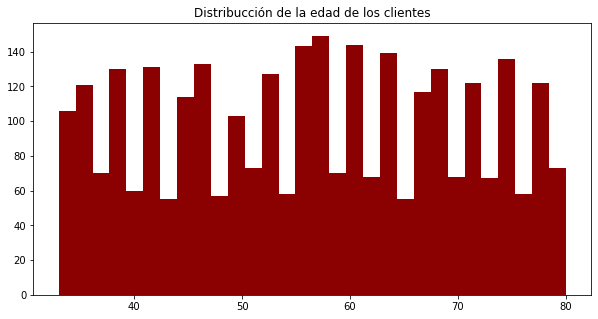

In [84]:
plt.figure(figsize=(10,5))
plt.hist(Edad, facecolor="darkred",bins=30)
plt.title("Distribucción de la edad de los clientes")
plt.show()

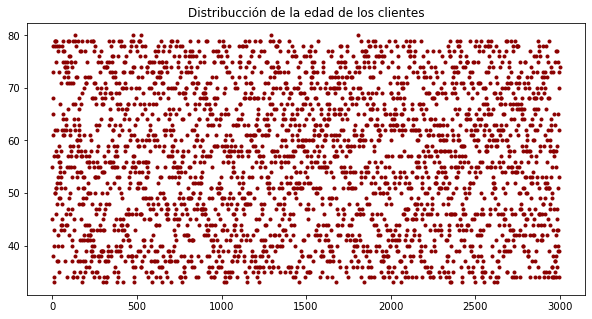

In [85]:
plt.figure(figsize=(10,5))
plt.plot(Edad, ".",color="darkred")
plt.title("Distribucción de la edad de los clientes")
plt.show()

## **Verificar Normalidad**

Grafica Q-Q

Gráfico Q-Q Los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

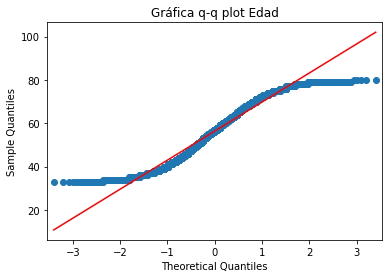

In [86]:
sms.qqplot(Edad, line="s")
plt.title("Gráfica q-q plot Edad")
plt.show()

**Métodos Analíticos**
Una prueba de hipótesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de una población dependiendo de la evidencia proporcionada por una muestra de datos.

Un punto de decisión importante al trabajar con una muestra de datos es si utilizar métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tienen una distribución conocida y específica, a menudo una distribución gaussiana. Si una muestra de datos no es gaussiana, entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

**Interpretación de una prueba**

La prueba de hipótesis generalmente involucra dos hipótesis: la hipótesis nula (H0) y la hipótesis alternativa (H1). La hipótesis nula es la afirmación que se somete a prueba y generalmente representa la afirmación de que no hay diferencia o relación entre variables, o que no hay efecto de una intervención o tratamiento. Por otro lado, la hipótesis alternativa es la afirmación contraria a la hipótesis nula y representa la existencia de una diferencia, relación o efecto.

* H0: La edad proviene de una distribucción Normal
* Ha: La edad proviene No proviene de una distribucción Normal

p valor;

* p <= alfa : rechazar H0, no es normal.
* p> alpha : No rechazar H0, No significa que sea cierta normalidad, Significa que es muy probable que sea Normal

**Prueba de Shapiro-Wilk**

Evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución gaussiana, llamada así por Samuel Shapiro y Martin Wilk.

En la práctica, se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos

**D'Agostino's K-squared test**

La prueba de D'Agostino-Pearson verifica si la forma de la distribución es similar a la forma de la distribución normal. Esta es una combinación de la prueba de asimetría y la prueba de curtosis

**Test de Shapiro**

In [87]:
stat,pvalue=stats.shapiro(Edad)

In [88]:
stat,pvalue

(0.956078290939331, 3.632004754119839e-29)

In [90]:
pvalue < 0.05

True

* con el alfa de significancia de 0.05; vemos que el p valor es menor que alfa, por lo tanto rechazamos H0, La Edad no proviene de una distribucción normal

## **Datos Atípicos**

**Boxplot**

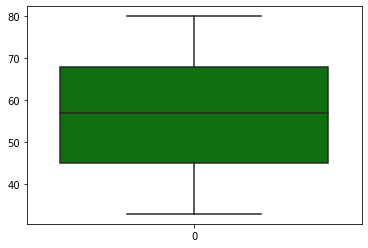

In [94]:
sns.boxplot(Edad, color="green");

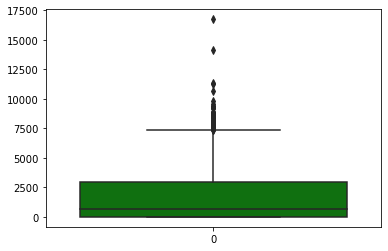

In [96]:
sns.boxplot(df_train.Gasto_Vehiculos, color="green");

## **Consecuencias de la falta de normalidad**
*  Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

**Teorema del Limite Central**

El teorema del límite central es un teorema fundamental de probabilidad y estadística. El teorema describe la distribución de la media de una muestra aleatoria proveniente de una población con varianza finita. Cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal.

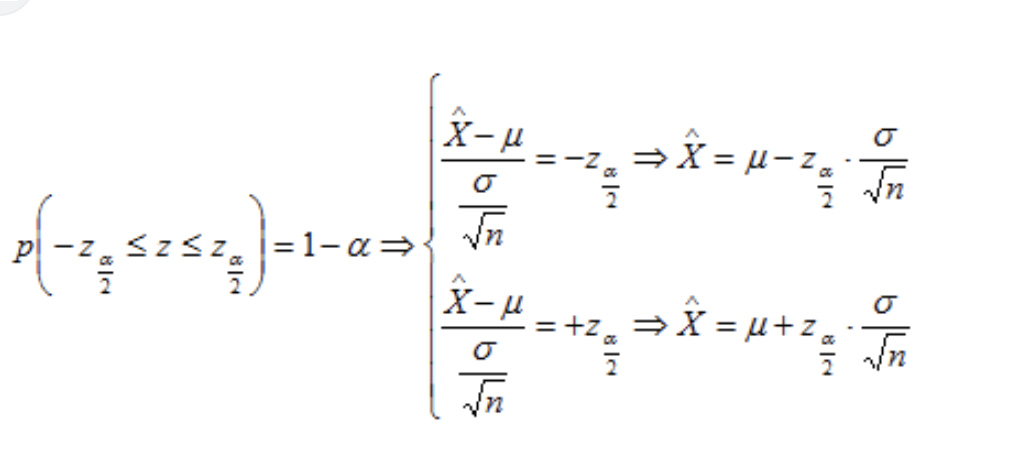

In [105]:
PromedioEdad=Edad.mean()
sdt=np.std(Edad,ddof=1)# Muestral
sdt

13.406172134135785

In [106]:
PromedioEdad

56.36978992997666

In [107]:
nivel_confianza=0.95
n=len(Edad)

In [110]:
Estadistico_z=stats.norm.ppf((1+nivel_confianza)/2)

In [111]:
Estadistico_z

1.959963984540054

In [112]:
MargenError=Estadistico_z*(sdt/np.sqrt(n))

In [118]:
intervalo_confianza1=(PromedioEdad-MargenError,PromedioEdad+MargenError)

In [119]:
intervalo_confianza1

(55.88998506239247, 56.849594797560854)

In [122]:
intervalo_confianza=DescrStatsW(Edad).tconfint_mean(alpha=1-0.95) ## Sale de forma rapida

In [121]:
intervalo_confianza

(55.88979127672903, 56.849788583224296)

## **Enfoque no Paramétrico para calcular un paramétro Poblacional: Simulación computacional**

Bootstrapping El bootstrapping (o bootstrap) es un método de remuestreo propuesto por Bradley Efron en 1979. Se utiliza para aproximar la distribución en el muestreo de un estadístico. Se usa frecuentemente para aproximar el sesgo o la varianza de un análisis estadístico, así como para construir intervalos de confianza o realizar contrastes de hipótesis sobre parámetros de interés. En la mayor parte de los casos no pueden obtenerse expresiones cerradas para las aproximaciones bootstrap y por lo tanto es necesario obtener remuestras en un ordenador para poner a prueba el método. La enorme potencia de cálculo de los ordenadores actuales facilita considerablemente la aplicabilidad de este método tan costoso computacionalmente

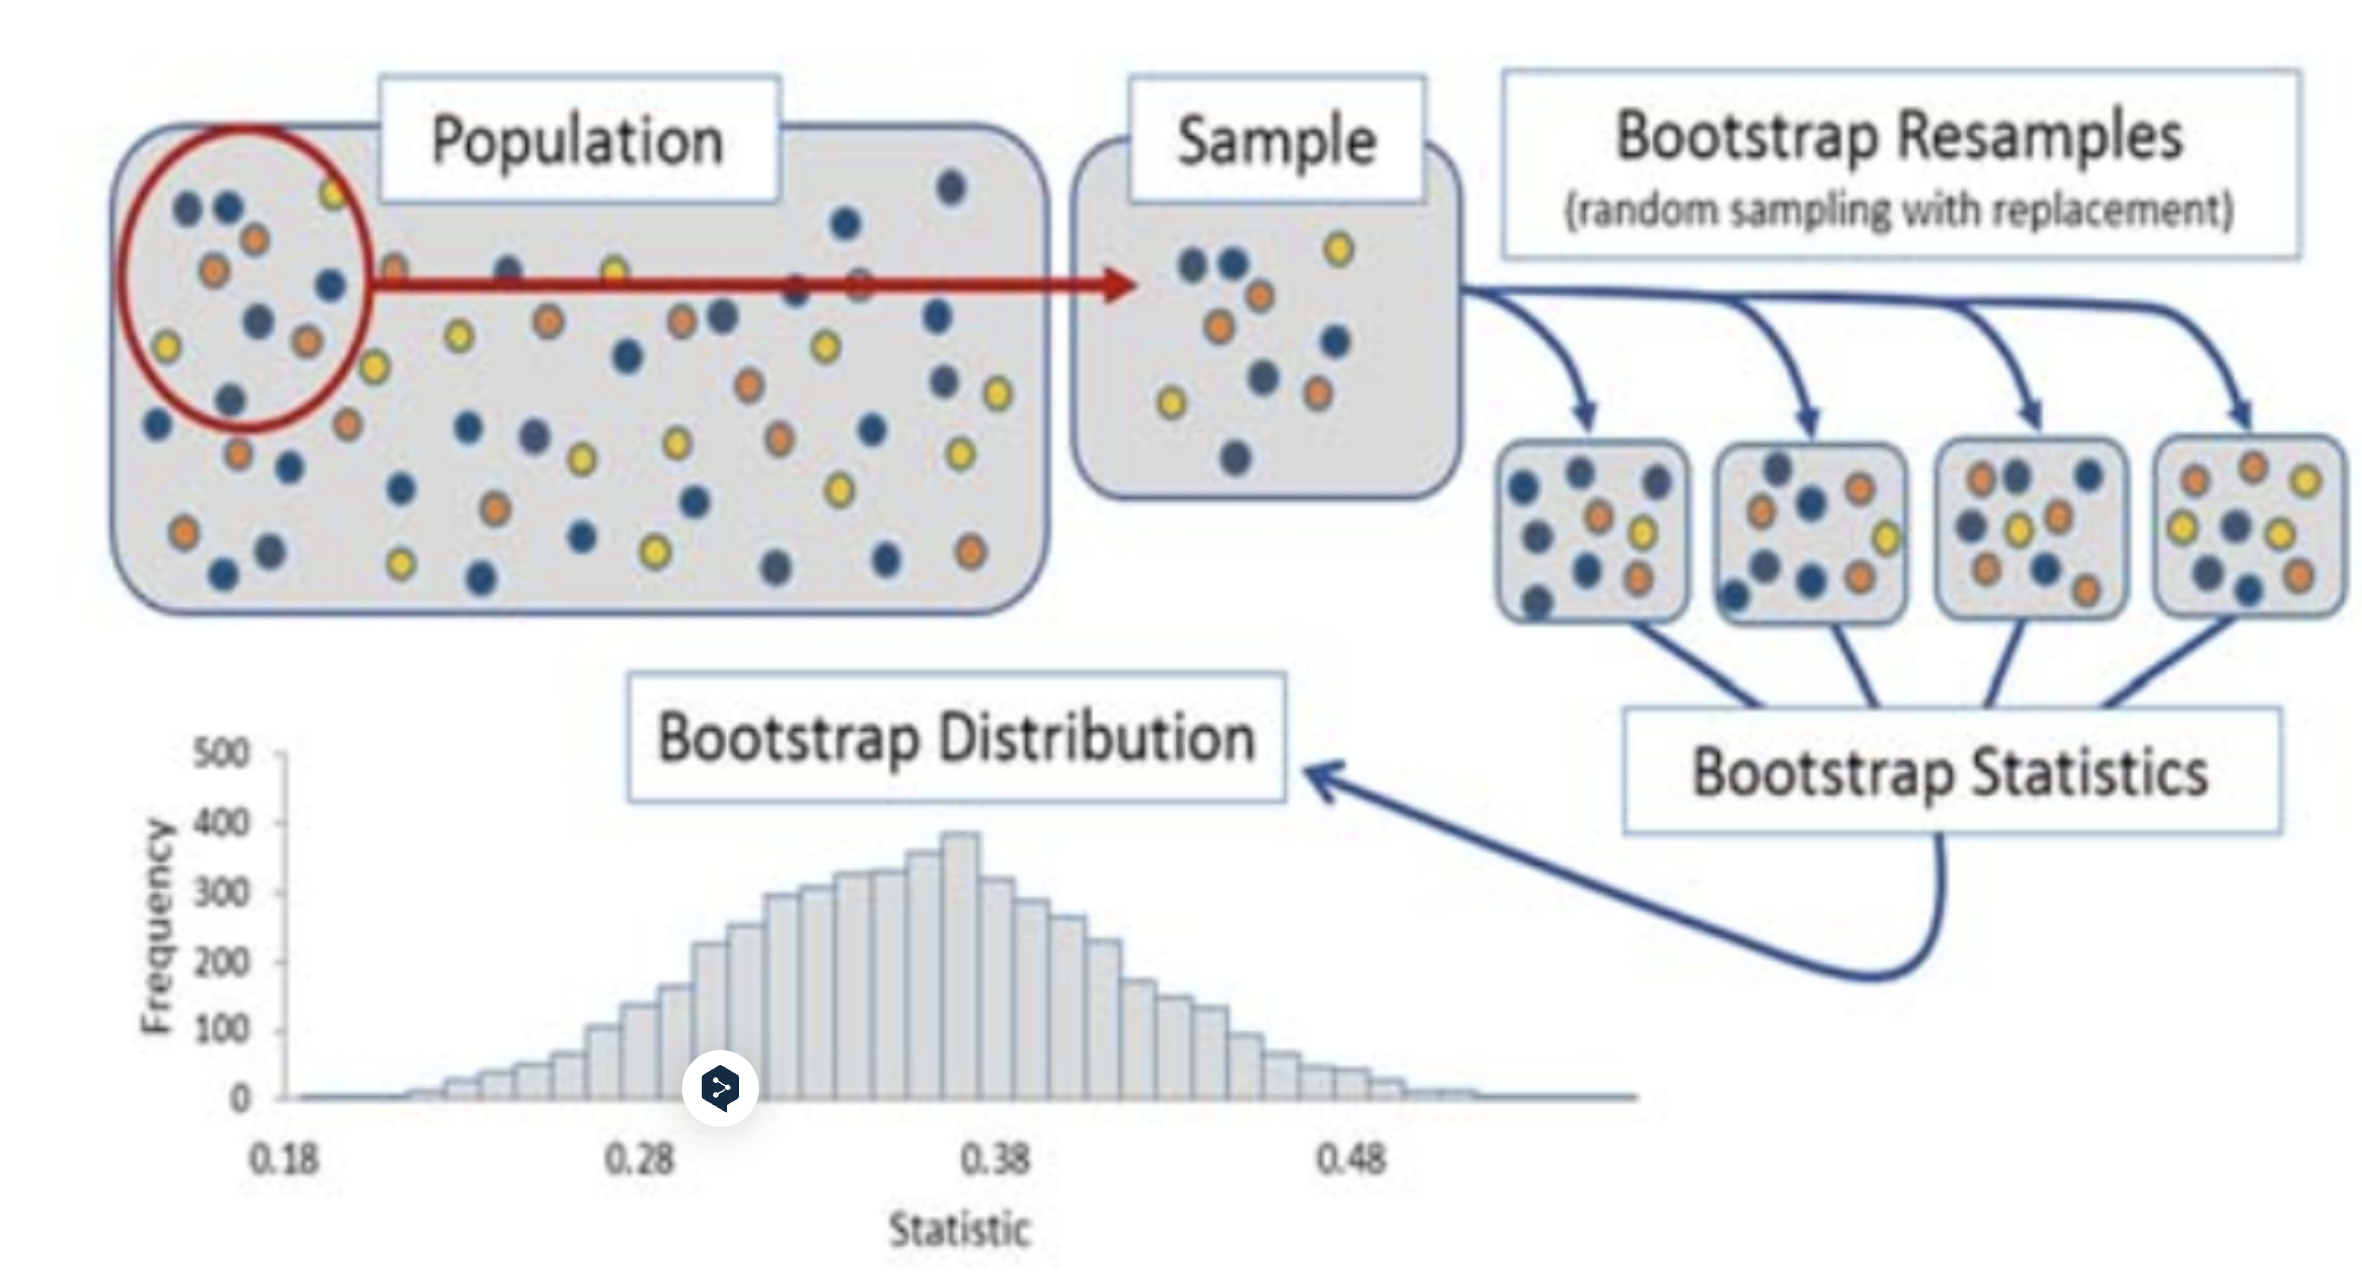

In [129]:
n=len(Edad)
n_bootstrap=5000

In [131]:
bootstrap_means=np.empty(n_bootstrap)

In [134]:
for i in range(n_bootstrap):
    bootstrap_sample=np.random.choice(Edad,size=n,replace=True)
    bootstrap_mean=np.mean(bootstrap_sample)
    bootstrap_means[i]= bootstrap_mean

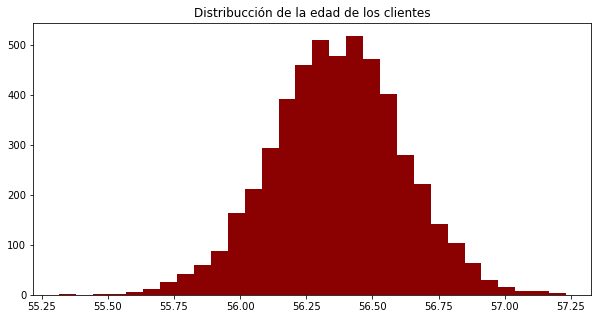

In [136]:
plt.figure(figsize=(10,5))
plt.hist(bootstrap_means, facecolor="darkred",bins=30)
plt.title("Distribucción de la edad de los clientes")
plt.show()

In [137]:
np.mean( bootstrap_means)

56.367241413804585

In [138]:
PromedioEdad

56.36978992997666

In [142]:
np.quantile(a=bootstrap_means,q=[0.025,0.975])

array([55.86724742, 56.84898299])

In [143]:
(55.88979127672903, 56.849788583224296)

(55.88979127672903, 56.849788583224296)

## **Análisis Bivariado: Numéricas vs Numéricas**

In [144]:
VariablesNumericas=df_train._get_numeric_data().columns.tolist()

In [145]:
VariablesNumericas

['Gasto_Vida',
 'Gasto_Vehiculos',
 'Gasto_Otros',
 'Tipo_Familia',
 'Tipo_Pareja',
 'Tipo_Soltero',
 'Educacion_Superior',
 'Educacion_Media',
 'Educacion_Baja',
 'Poblacion_Empresario',
 'Poblacion_Funcionario',
 'Poblacion_Trabajador_Cualificado',
 'Poblacion_Trabajador_No_Cualificado',
 'Vivienda_Propiedad',
 'Vivienda_Alquiler',
 'Medico_Seguro_Privado',
 'Medico_Seguridad_Social',
 'Ingresos_Mas_De_40000',
 'Ingresos_De_20000_Hasta_40000',
 'Ingresos_Hasta_20000',
 'Edad',
 'Anio Alta']

In [148]:
Variables_Categoricas=df_train.select_dtypes(include=["category"]).columns.tolist()

In [149]:
Variables_Categoricas

['Sexo',
 'Productos_Vida',
 'Productos_Vehiculos',
 'Productos_Otros',
 'CompraSeguro',
 'Mes Alta',
 'Dia Semana']

## **Numérica vs Numérica**

Correlación de Pearson


La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

1: correlación lineal positiva total.
0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
-1: correlación lineal negativa total


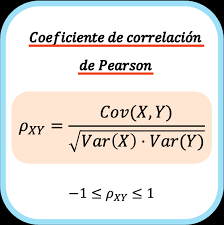

**Scatterplot**

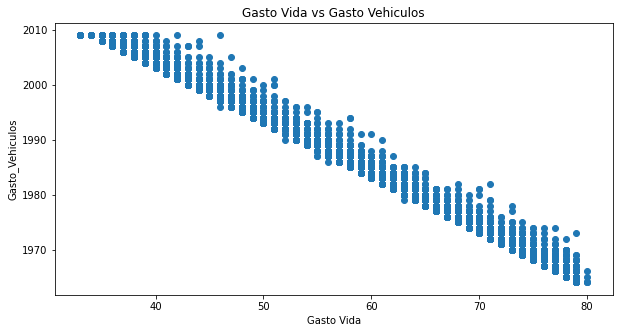

In [157]:
plt.figure(figsize=(10,5))
plt.scatter(df_train.Edad,df_train["Anio Alta"])
plt.title("Gasto Vida vs Gasto Vehiculos")
plt.xlabel("Gasto Vida")
plt.ylabel("Gasto_Vehiculos")
plt.show()

In [158]:
stats.pearsonr(df_train.Edad,df_train["Anio Alta"])[0]

-0.9930537387532672

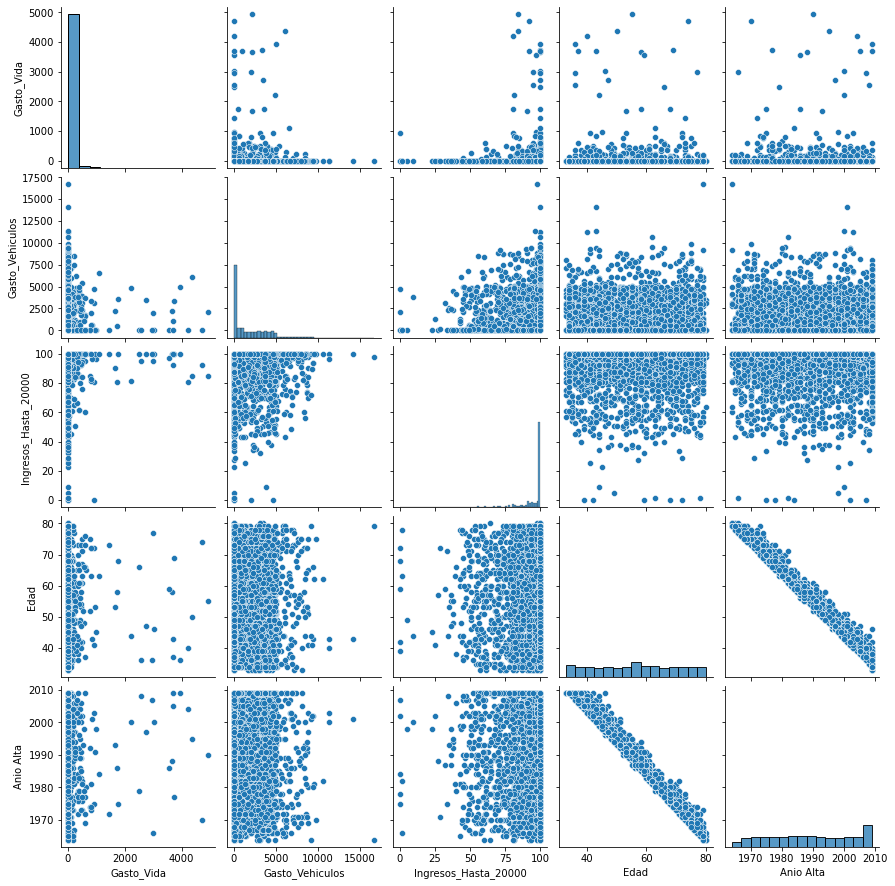

In [155]:
sns.pairplot(df_train[['Gasto_Vida',
 'Gasto_Vehiculos',
 'Ingresos_Hasta_20000',
 'Edad',
 'Anio Alta']])

**Matrix de correlación**

In [160]:
Matrix_Correlacion=df_train[VariablesNumericas].corr()

In [161]:
Matrix_Correlacion

,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad,Anio Alta
Gasto_Vida,1.000000,0.020859,0.032067,0.025386,0.001186,-0.031248,0.008660,0.021635,-0.021871,0.014786,0.005586,-0.011034,-0.009041,0.026197,-0.026197,0.016034,-0.016034,-0.015373,0.003133,0.003129,-0.018243,0.019344
Gasto_Vehiculos,0.020859,1.000000,0.108313,0.038353,0.009480,-0.055063,0.051935,-0.003460,-0.031225,0.067709,-0.014274,-0.039104,-0.018322,0.100044,-0.100044,0.068441,-0.068441,0.001408,0.021469,-0.019107,0.010908,-0.010388
Gasto_Otros,0.032067,0.108313,1.000000,0.006336,0.027566,-0.035335,-0.010436,0.004809,0.002654,0.055616,-0.047071,-0.033838,0.019143,0.127923,-0.127923,0.047687,-0.047687,-0.004998,-0.001301,0.003024,0.023931,-0.024246
Tipo_Familia,0.025386,0.038353,0.006336,1.000000,-0.603689,-0.628221,-0.010575,-0.071631,0.062311,-0.039406,-0.030171,0.134801,-0.055871,0.242571,-0.242571,0.020237,-0.020237,0.037963,0.080150,-0.083787,0.028869,-0.028047
Tipo_Pareja,0.001186,0.009480,0.027566,-0.603689,1.000000,-0.240013,0.073934,0.116821,-0.138996,0.147621,0.021536,-0.113547,-0.068875,0.056139,-0.056139,0.120827,-0.120827,0.038284,0.043766,-0.052404,-0.042473,0.042325
Tipo_Soltero,-0.031248,-0.055063,-0.035335,-0.628221,-0.240013,1.000000,-0.056384,-0.026424,0.059101,-0.094388,0.016278,-0.052326,0.136382,-0.350630,0.350630,-0.140442,0.140442,-0.081690,-0.136480,0.149137,0.004898,-0.005766
Educacion_Superior,0.008660,0.051935,-0.010436,-0.010575,0.073934,-0.056384,1.000000,-0.038771,-0.633460,0.617364,0.005326,-0.356292,-0.315743,0.257470,-0.257470,0.501999,-0.501999,0.266713,0.343107,-0.398153,-0.007032,0.007635
Educacion_Media,0.021635,-0.003460,0.004809,-0.071631,0.116821,-0.026424,-0.038771,1.000000,-0.747861,0.141373,0.393360,-0.328774,-0.236204,0.085808,-0.085808,0.237419,-0.237419,0.019872,0.057546,-0.057348,0.032953,-0.034490
Educacion_Baja,-0.021871,-0.031225,0.002654,0.062311,-0.138996,0.059101,-0.633460,-0.747861,1.000000,-0.519113,-0.307548,0.492384,0.393974,-0.238366,0.238366,-0.516336,0.516336,-0.191490,-0.270020,0.306361,-0.021924,0.022702
Poblacion_Empresario,0.014786,0.067709,0.055616,-0.039406,0.147621,-0.094388,0.617364,0.141373,-0.519113,1.000000,-0.248269,-0.410127,-0.416116,0.340240,-0.340240,0.615635,-0.615635,0.191406,0.299838,-0.332136,0.010426,-0.009849


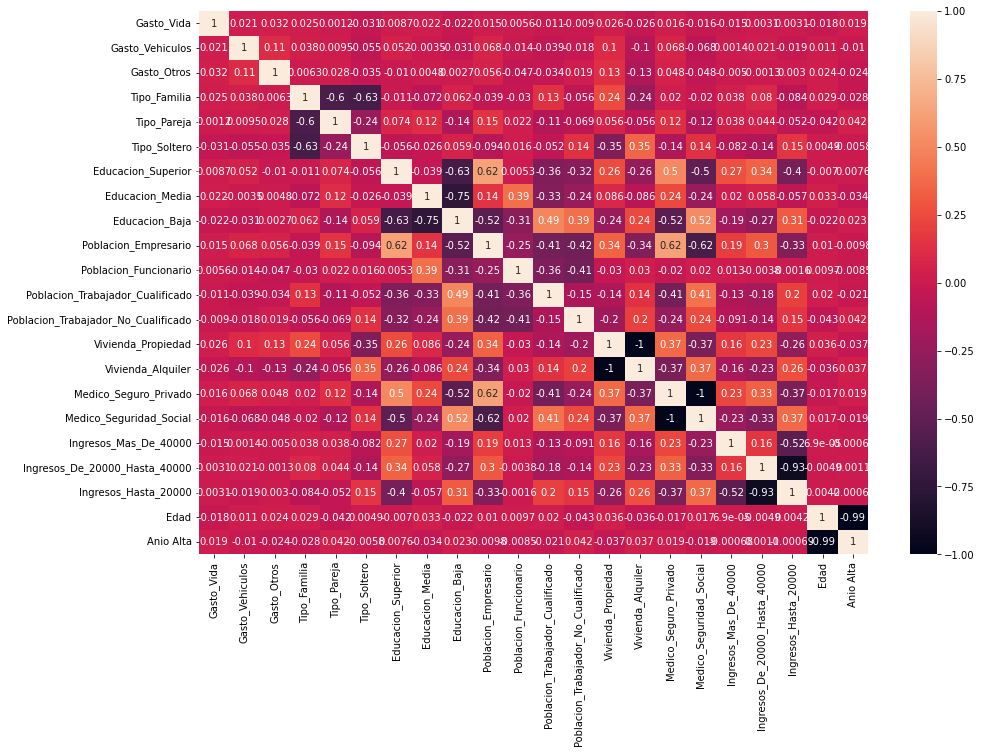

In [163]:
plt.figure(figsize=(15,10))
sns.heatmap(Matrix_Correlacion,annot=True)
plt.show()

In [164]:
def remove_collinear_features(x, threshold):
    '''
    Objetivo:
        Eliminar características colineales en un marco de datos con un coeficiente de correlación
        mayor que el umbral. La eliminación de características colineales puede ayudar a un modelo
        generalizar y mejora la interpretabilidad del modelo.

    Entradas:
        x: marco de datos de características
        umbral: se eliminan las entidades con correlaciones superiores a este valor

    Producción:
        marco de datos que contiene solo las características no altamente colineales
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x
